<a href="https://colab.research.google.com/github/RozitaAbdoli/telecom_customer_defection/blob/main/EDA_telecom_customer_defection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Exploratory Data Analysis 


In [12]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Retrieve the dataset.

In [13]:
from google.colab import files
uploaded = files.upload()

Saving telecom_dataset.arff to telecom_dataset (1).arff


In [14]:
data_file="telecom_dataset.arff"
data=arff.loadarff(data_file)
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    df[col] = df[col].str.decode('utf-8') #data is not read as bytes but as string values from a file
print(df.dtypes)                          #Look at loaded data and data types

State                            object
Account Length                  float64
Area Code                        object
Phone Number                     object
Inter Plan                       object
VoiceMail Plan                   object
No of Vmail Mesgs               float64
Total Day Min                   float64
Total Day calls                 float64
Total Day Charge                float64
Total Evening Min               float64
Total Evening Calls             float64
Total Evening Charge            float64
Total Night Minutes             float64
Total Night Calls               float64
Total Night Charge              float64
Total Int Min                   float64
Total Int Calls                 float64
Total Int Charge                float64
No of Calls Customer Service    float64
Churn                            object
dtype: object


In [15]:
# display first 10 records 
df.head(10)


,State,Account Length,Area Code,Phone Number,Inter Plan,VoiceMail Plan,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Int Min,Total Int Calls,Total Int Charge,No of Calls Customer Service,Churn
0,OH,107.0,A415,371-7191,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,FALSE
1,NJ,137.0,A415,358-1921,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,FALSE
2,OH,84.0,A408,375-9999,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,FALSE
3,OK,75.0,A415,330-6626,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,FALSE
4,AL,118.0,A510,391-8027,yes,no,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,FALSE
5,MA,121.0,A510,355-9993,no,yes,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,FALSE
6,MO,147.0,A415,329-9001,yes,no,0.0,157.0,79.0,26.69,103.1,94.0,8.76,211.8,96.0,9.53,7.1,6.0,1.92,0.0,FALSE
7,LA,117.0,A408,335-4719,no,no,0.0,184.5,97.0,31.37,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4.0,2.35,1.0,FALSE
8,WV,141.0,A415,330-8173,yes,yes,37.0,258.6,84.0,43.96,222.0,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0,FALSE
9,IN,65.0,A415,329-6603,no,no,0.0,129.1,137.0,21.95,228.5,83.0,19.42,208.8,111.0,9.40,12.7,6.0,3.43,4.0,TRUE


In [16]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         3333 non-null   object 
 1   Account Length                3333 non-null   float64
 2   Area Code                     3333 non-null   object 
 3   Phone Number                  3333 non-null   object 
 4   Inter Plan                    3333 non-null   object 
 5   VoiceMail Plan                3333 non-null   object 
 6   No of Vmail Mesgs             3333 non-null   float64
 7   Total Day Min                 3333 non-null   float64
 8   Total Day calls               3333 non-null   float64
 9   Total Day Charge              3333 non-null   float64
 10  Total Evening Min             3333 non-null   float64
 11  Total Evening Calls           3333 non-null   float64
 12  Total Evening Charge          3333 non-null   float64
 13  Tot

In [17]:
# Look at meta information about numeric data, and also see if there are any extreme values.
df.describe()

,Account Length,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Int Min,Total Int Calls,Total Int Charge,No of Calls Customer Service
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
# Checking if there are any missing values
df.isna().sum()

State                           0
Account Length                  0
Area Code                       0
Phone Number                    0
Inter Plan                      0
VoiceMail Plan                  0
No of Vmail Mesgs               0
Total Day Min                   0
Total Day calls                 0
Total Day Charge                0
Total Evening Min               0
Total Evening Calls             0
Total Evening Charge            0
Total Night Minutes             0
Total Night Calls               0
Total Night Charge              0
Total Int Min                   0
Total Int Calls                 0
Total Int Charge                0
No of Calls Customer Service    0
Churn                           0
dtype: int64

In [19]:
# Checking if there are any duplicates
df.duplicated().sum()

0

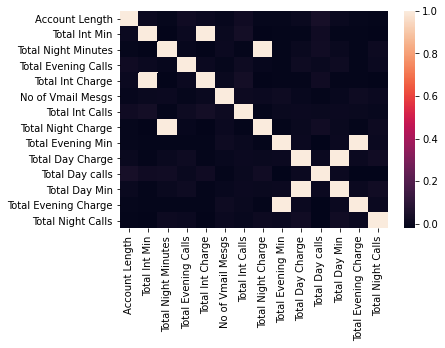

In [20]:
#heat map of the correlation between predictor variables
numerical = list(set(df.columns)-set(['State', 'Inter Plan', 'VoiceMail Plan',
                                     'Area Code', 'Churn', 'No of Calls Customer Service']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

Pearson correlation between predictor variables and the dependent variable "Churn". Correlations are reported from highest to lowest. As a test, correlation of "Churn" with itself should be 1.

In [21]:
df['Churn'] = (df['Churn'] == 'TRUE').astype(int)
df["Inter Plan"] = df['Inter Plan'].replace({'no': 0, 'yes': 1}).astype(int)
df['VoiceMail Plan'] = df['VoiceMail Plan'].replace({'no': 0, 'yes': 1}).astype(int)
#First remove the "A" from area code, then convert to integer
df["Area Code"] = df['Area Code'].replace({'A415': '415', 'A408': '408', 'A510':'510'})
df['Area Code'] = df['Area Code'].astype(str)
df['Area Code'] = df['Area Code'].astype(int)
quantitative = list(set(df.columns)-set(['State', 'Phone Number']))

l=[]
for i in quantitative:
  s=[i, df[i].corr(df['Churn'])]
  l.append(s)
#obtain the absolute values of the correlations
l_pos =[]
for i in l:
 i = [[i[0],abs (i[1])]]
 l_pos = l_pos + i
l_pos
#Sort from high to low (Correlation of "Churn" with "Churn" should be 1)
l_pos_sorted = sorted(l_pos, key=lambda x: x[1], reverse=True)
for k in l_pos_sorted:
  print(k)

['Churn', 1.0]
['Inter Plan', 0.2598518473454828]
['No of Calls Customer Service', 0.20874999878379405]
['Total Day Min', 0.20515082926139028]
['Total Day Charge', 0.2051507431701537]
['VoiceMail Plan', 0.10214814067014708]
['Total Evening Min', 0.09279579031259165]
['Total Evening Charge', 0.09278603942871358]
['No of Vmail Mesgs', 0.08972796983506436]
['Total Int Charge', 0.06825863150391491]
['Total Int Min', 0.06823877562717723]
['Total Int Calls', 0.05284433577413811]
['Total Night Charge', 0.03549555624050671]
['Total Night Minutes', 0.03549285342127401]
['Total Day calls', 0.018459311608576896]
['Account Length', 0.01654074224367413]
['Total Evening Calls', 0.009233131913078278]
['Area Code', 0.006174233160678202]
['Total Night Calls', 0.0061412030073997054]


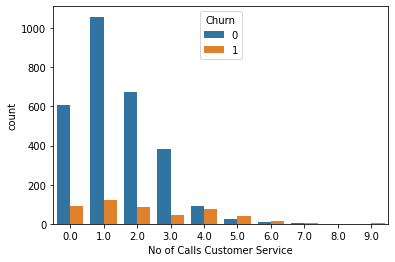

In [22]:
sns.countplot(x='No of Calls Customer Service', hue='Churn', data=df);
#Custoemers with 4+ calls to Customer Service are more likely to churn